<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/IQRtransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scale Data With Outliners

Load Diabetes Dataset

(768, 9)
                0           1           2  ...           6           7           8
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     0.348958    3.845052  120.894531  ...   31.992578    0.471876   33.240885
std      0.476951    3.369578   31.972618  ...    7.884160    0.331329   11.760232
min      0.000000    0.000000    0.000000  ...    0.000000    0.078000   21.000000
25%      0.000000    1.000000   99.000000  ...   27.300000    0.243750   24.000000
50%      0.000000    3.000000  117.000000  ...   32.000000    0.372500   29.000000
75%      1.000000    6.000000  140.250000  ...   36.600000    0.626250   41.000000
max      1.000000   17.000000  199.000000  ...   67.100000    2.420000   81.000000

[8 rows x 9 columns]


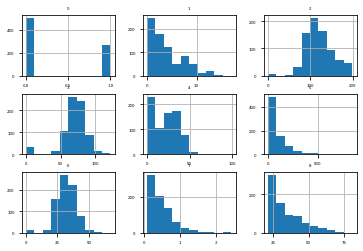

In [1]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv',header=None)
# summarize  the shape of the dataset
print(dataset.shape)
# summraize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

(8434, 8)
              850nm         640nm  ...  Channel 7  Channel 8
count  8.434000e+03  8.434000e+03  ...     8434.0     8434.0
mean  -7.178769e+04 -1.008243e+06  ...        0.0        0.0
std    2.138527e+05  1.162708e+05  ...        0.0        0.0
min   -1.923690e+06 -1.649130e+06  ...        0.0        0.0
25%   -2.185098e+05 -1.106795e+06  ...        0.0        0.0
50%   -1.313200e+05 -9.512110e+05  ...        0.0        0.0
75%    4.686000e+03 -9.302318e+05  ...        0.0        0.0
max    4.593000e+05 -8.789390e+05  ...        0.0        0.0

[8 rows x 8 columns]


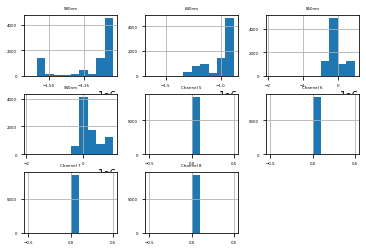

In [5]:
mydata = read_csv('fits.csv', header=0)

print(mydata.shape)
print(mydata.describe())
fig1 = mydata.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig1.ravel()]
pyplot.show()

In [6]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load dataset
dataset = read_csv('https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv', header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:, 1:], data[:,0]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)'% (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


# IQR Robust Scaler Transform

                0           1           2  ...           5           6           7
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     0.169010    0.094413   -0.160807  ...   -0.000798    0.259807    0.249464
std      0.673916    0.775094    1.075323  ...    0.847759    0.866219    0.691778
min     -0.600000   -2.836364   -4.000000  ...   -3.440860   -0.769935   -0.470588
25%     -0.400000   -0.436364   -0.555556  ...   -0.505376   -0.336601   -0.294118
50%      0.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
75%      0.600000    0.563636    0.444444  ...    0.494624    0.663399    0.705882
max      2.800000    1.987879    2.777778  ...    3.774194    5.352941    3.058824

[8 rows x 8 columns]


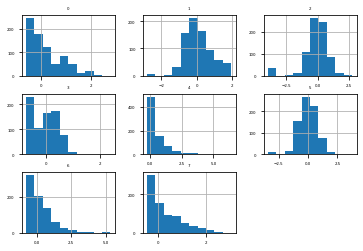

In [7]:
from numpy import mean
from numpy import std
from pandas import read_csv
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

# load dataset
dataset = read_csv('https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv', header=None)
data = dataset.values[:,1:]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histogram of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

In [8]:
# evaluate knn on the diabetes dataset with robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# load dataset
dataset = read_csv('https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv', header=None)
data = dataset.values
# seperate into input and output columns
X, y = data[:,1:], data[:,0]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f(%.3f)'% (mean(n_scores),std(n_scores)))

Accuracy: 0.734(0.044)


# Explore Robust Scaler Range

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


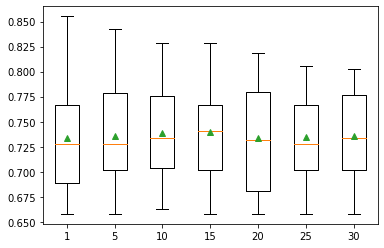

In [13]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
  #load dataset
  dataset = read_csv('https://rioultf.users.greyc.fr/uci/files/pima-indians-diabetes/pima-indians-diabetes.csv', header=None)
  data = dataset.values
  # seperate into input and output columns
  X, y = data[:,1:], data[:,0]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for value in [1, 5, 10, 15, 20, 25, 30]:
    #define the pipeline
    trans = RobustScaler(quantile_range=(value, 100-value))
    model = KNeighborsClassifier()
    models[str(value)]= Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)'% (name, mean(scores), std(scores)))
# print model performance for comparison
pyplot.boxplot(results, labels=names, showmeans= True)
pyplot.show()